In [2]:
# This is just a test script for the nn_fuzzy module
# At the bottom you can se the generated images after
# fuzzification by the nn_fuzzy module

In [3]:
import time
import math

import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras.datasets as datasets

from nn_fuzzy import fuzzify_dataset

In [4]:
def getDataset(name, nClass):
    if name=="mnist":
        dataset = datasets.mnist
    (x_train, y_train),(x_test, y_test) = dataset.load_data()     #downloading and loading the dataset
    x_train, x_test = x_train, x_test            #normalizing the input data
    x_train_flat = x_train.reshape(x_train.shape[0],-1)         #making dataset suitable for input in Fully Connected layer
    x_test_flat = x_test.reshape(x_test.shape[0],-1)          #making dataset suitable for input in Fully Connected layer
    y_train_onehot = np.eye(nClass)[y_train]                    #converting to one hot vectors
    y_test_onehot = np.eye(nClass)[y_test]                     #converting to one hot vectors
    print(x_train_flat.shape)
    print(y_train_onehot.shape)
    x_train_batch = np.array_split(x_train_flat, int(60000/128))
    print(x_train_batch[2].shape)
    return x_train_flat,x_test_flat,y_train_onehot,y_test_onehot

x_train, x_test, y_train, y_test = getDataset("mnist", 10)

(60000, 784)
(60000, 10)
(129, 784)


In [5]:
print('X_train Shape:', end = ' ')
print(x_train.shape)
print('X_Test Shape:', end = ' ')
print(x_test.shape)
print('Y_Train Shape:', end =' ')
print(y_train.shape)
print('Y_Test Shape:', end = ' ')
print(y_test.shape)

X_train Shape: (60000, 784)
X_Test Shape: (10000, 784)
Y_Train Shape: (60000, 10)
Y_Test Shape: (10000, 10)


In [6]:
x_train_fuzzy, x_test_fuzzy, y_train_fuzzy, y_test_fuzzy = fuzzify_dataset(x_train[:100], x_test[:100], y_train, y_test, cnn=1)

Time taken to fuzzify - x_train : 0.2337656021118164
Time taken to fuzzify - x_test : 0.27309417724609375
(10, 784)
(10, 784)
Time taken to fuzzify - y_train : 0.03620409965515137
Time taken to fuzzify - y_train : 4.76837158203125e-07


In [7]:
x_train_fuzzy = x_train_fuzzy.reshape(-1, 3, 28, 28)
x_test_fuzzy = x_test_fuzzy.reshape(-1, 3, 28, 28)

array([3.14397892e-05, 1.17090374e-05, 2.92217942e-05, 3.17234884e-05,
       7.44164663e-02, 1.29360465e-05, 1.60612282e-05, 1.55863170e-05,
       1.52805015e-05, 2.19573517e-05])

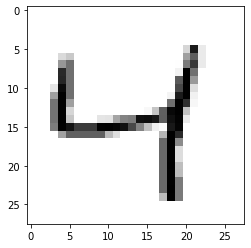

In [8]:
index = 2
plt.imshow(x_train[index].reshape(28,28), cmap='Greys')
y_train_fuzzy[index]

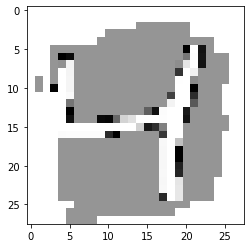

In [9]:
plt.imshow(x_train_fuzzy[index][0].reshape(28,28), cmap='Greys')

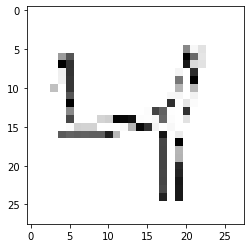

In [10]:
plt.imshow(x_train_fuzzy[index][1].reshape(28,28), cmap='Greys')

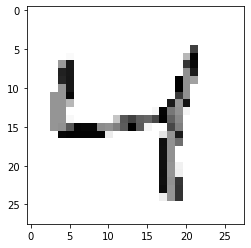

In [11]:
plt.imshow(x_train_fuzzy[index][2].reshape(28,28), cmap='Greys')